In [1]:
import pandas as pd

In [5]:
df=pd.read_csv("C:/Users/sanke/Downloads/Housing.csv")

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w]', '', regex=True)

# Check first few rows
print(df.head())
print(df.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

## Handle Missing Values

In [18]:
# Check missing values
print(df.isnull().sum())

# Impute or drop missing values
# Example: drop rows with missing price
df = df.dropna(subset=['price'])

# For other missing numeric values, fill with median
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# For categorical columns, fill with mode
categorical_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


## Filter data

In [23]:
# Example: Filter properties with area > 1000 and airconditioning = 'yes'
filtered_df = df[(df['area'] > 1000) & (df['airconditioning'] == 'yes')]

## Encode categorical variables

In [26]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Or Label Encoding (for ordinal variables)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['furnishingstatus_encoded'] = le.fit_transform(df['furnishingstatus'])


## Aggregrate data

In [29]:
# Average price by number of bedrooms
avg_price_bedrooms = df.groupby('bedrooms')['price'].mean()
print(avg_price_bedrooms)

# Average price by furnishing status
avg_price_furnishing = df.groupby('furnishingstatus')['price'].mean()
print(avg_price_furnishing)

# Count of properties per area
property_counts = df['area'].value_counts()
print(property_counts)


bedrooms
1    2.712500e+06
2    3.632022e+06
3    4.954598e+06
4    5.729758e+06
5    5.819800e+06
6    4.791500e+06
Name: price, dtype: float64
furnishingstatus
furnished         5.495696e+06
semi-furnished    4.907524e+06
unfurnished       4.013831e+06
Name: price, dtype: float64
area
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: count, Length: 284, dtype: int64


## Handle outliers

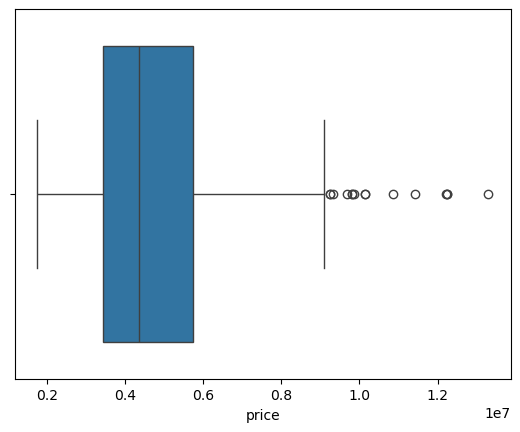

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to visualize outliers
sns.boxplot(x=df['price'])
plt.show()

# Remove extreme outliers using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower) & (df['price'] <= upper)]
